In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [61]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [62]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [63]:
train_images.dtype

dtype('uint8')

In [64]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [65]:
X_tr, X_val  = train_images / 255, test_images / 255



X_tr_norm = X_tr.reshape((train_images.shape[0], 28, 28, 1))
X_val_norm = X_val.reshape((test_images.shape[0], 28, 28, 1))

In [66]:
X_tr_norm.shape

(60000, 28, 28, 1)

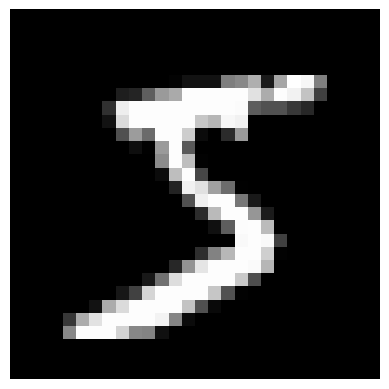

In [67]:
plt.imshow(X_tr_norm[0], cmap='gray')
plt.axis('off')
plt.show()

In [68]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [69]:
y_tr, y_val = to_categorical(train_labels, 10),to_categorical(test_labels, 10)

In [70]:
y_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [71]:
y_tr.shape

(60000, 10)

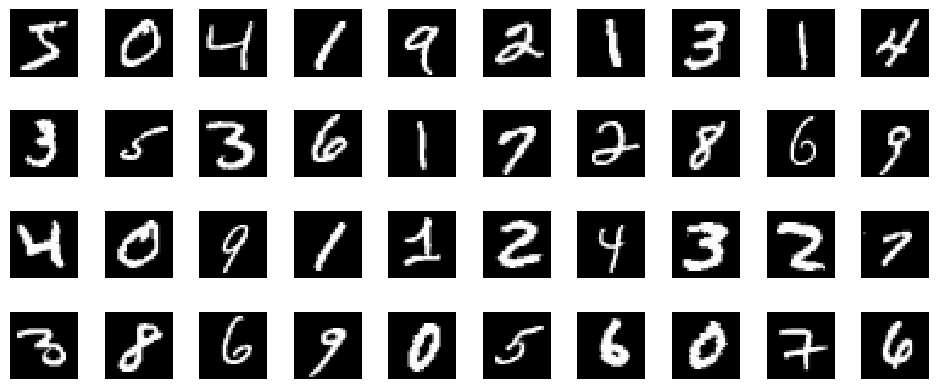

In [72]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_tr[index], cmap="gray", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [73]:

data_augmentation = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)



In [74]:
tr_aug_generator = data_augmentation.flow(X_tr_norm, y_tr, batch_size=64)

In [75]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [77]:
history = model.fit(tr_aug_generator,
                    epochs=10,
                    validation_data=(X_val_norm, y_val))

Epoch 1/10
938/938 [==============================] - 74s 78ms/step - loss: 0.3579 - accuracy: 0.8884 - val_loss: 0.0647 - val_accuracy: 0.9795
Epoch 2/10
938/938 [==============================] - 72s 76ms/step - loss: 0.1163 - accuracy: 0.9637 - val_loss: 0.0455 - val_accuracy: 0.9847
Epoch 3/10
938/938 [==============================] - 72s 77ms/step - loss: 0.0841 - accuracy: 0.9740 - val_loss: 0.0324 - val_accuracy: 0.9895
Epoch 4/10
938/938 [==============================] - 72s 77ms/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0315 - val_accuracy: 0.9899
Epoch 5/10
938/938 [==============================] - 73s 78ms/step - loss: 0.0598 - accuracy: 0.9811 - val_loss: 0.0368 - val_accuracy: 0.9871
Epoch 6/10
938/938 [==============================] - 73s 78ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.0254 - val_accuracy: 0.9912
Epoch 7/10
938/938 [==============================] - 71s 76ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0254 - val_accuracy:

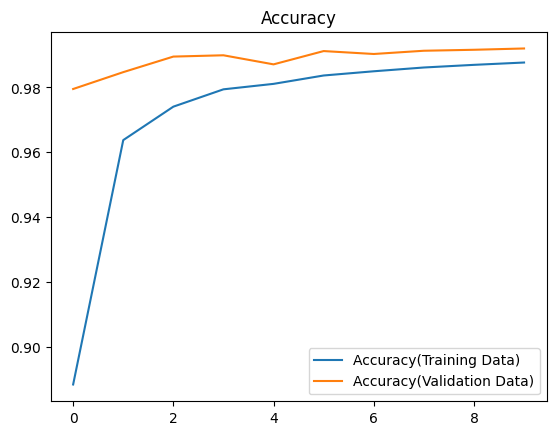

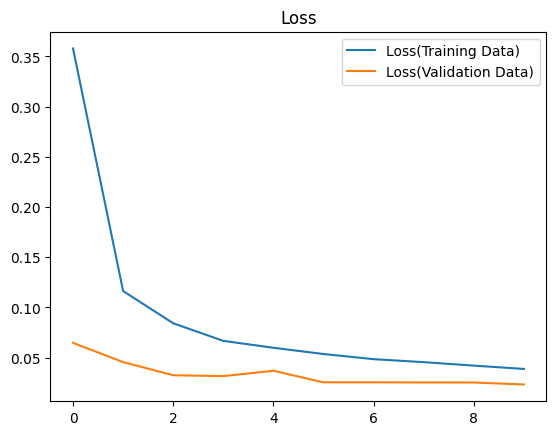

In [78]:
plt.plot(history.history['accuracy'], label='Accuracy(Training Data)')
plt.plot(history.history['val_accuracy'], label='Accuracy(Validation Data)')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss(Training Data)')
plt.plot(history.history['val_loss'], label='Loss(Validation Data)')
plt.title('Loss')
plt.legend()
plt.show()

In [80]:
loss, acc = model.evaluate(X_val_norm, y_val)
print(f'Accuracy: {acc}, loss: {loss}')

313/313 [==============================] - 5s 15ms/step - loss: 0.0232 - accuracy: 0.9920
Accuracy: 0.9919999837875366, loss: 0.023196039721369743
